# Load data

In [1]:
import numpy as np
import sys
import os
import glob
import importlib
import math as m
import pickle as pickle
import seaborn as sns
import statistics
import pandas as pd
fmts = ['svg','pdf']
from scipy.stats import norm, wilcoxon, ttest_rel, friedmanchisquare, shapiro,f_oneway,friedmanchisquare,rankdata
import statsmodels.stats.multitest as smm
from scipy import signal, fft
from scipy.optimize import curve_fit, minimize
import scipy.interpolate as interp
import matplotlib # produce matlab-style plots
from matplotlib import animation as ani # animation
import matplotlib.pyplot as plt # Matlab-style plotting
from matplotlib import rcParams
from matplotlib.lines import Line2D
from itertools import combinations
matplotlib.rc('font',**{'size':20}) # increase font size on plots
matplotlib.rc('text',usetex=False) # use LaTeX to render symbols
matplotlib.rc('animation',html='html5') # render animation
prop_cycle = plt.rcParams['axes.prop_cycle']
python_colors = prop_cycle.by_key()['color'] # python default color cycle

# auto reload modules
%load_ext autoreload
%autoreload 2
sys.path.append('C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion\\analysis\\Multimodal paper') # change this for your computer
# DATA_PATH = 'C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion' #change this for your computer

rcParams.update(matplotlib.rcParamsDefault)
# font = {#'family': 'serif', 'serif': ['Computer Modern'],
#         'weight' : 'ultralight',
#         'size'   : 14}
# matplotlib.rc('font', **font)
rcParams['axes.titlesize'] = 14
rcParams['font.size'] = 14
rcParams['font.weight'] = 'ultralight'
# rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'cm'
# rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

In [2]:
from globalVars import *
from collect_data import findFilename, getrawdata, get_data, analyze
from analysis import *

c:\Users\amber\Documents\GitHub\sensorimotor_fusion\analysis\Multimodal paper\globalVars.py:29: RuntimeWarning: divide by zero encountered in true_divide
  soM = lambda s : 1/(s**2 + s) #2nd order machine
c:\Users\amber\Documents\GitHub\sensorimotor_fusion\analysis\Multimodal paper\globalVars.py:29: RuntimeWarning: invalid value encountered in true_divide
  soM = lambda s : 1/(s**2 + s) #2nd order machine


In [3]:
print('data length = ',N)
print('primes = ',primes)
print('base freq = ',base_freq)
print('IX = ',IX)
print('Even_IX = ',Even_IX)
print('Odd_IX = ',Odd_IX)
print('freqs = ',freqs)
print('omegas = ',omegas)
print('T = ',T) # total time 40 seconds
print('t = ',t) # timestamps
print('fs = ',fs)
print('sample_period (dt)= ',dt)
print('xf = ',xf) # frequency domain x-axis, shape (N//2,)
print('Machine = ',M) # soM at stimulated freqs
print('scaleInput = ',scaleInput)
print('scaleOutputScreen = ',scaleOutputScreen)

data length =  2400
primes =  [ 2  3  5  7 11 13 17 19]
base freq =  0.05
IX =  [ 4  6 10 14 22 26 34 38]
Even_IX =  [ 6 14 26 38]
Odd_IX =  [ 4 10 22 34]
freqs =  [0.1  0.15 0.25 0.35 0.55 0.65 0.85 0.95]
omegas =  [0.62831853 0.9424778  1.57079633 2.19911486 3.45575192 4.08407045
 5.34070751 5.96902604]
T =  40
t =  [0.00000000e+00 1.66736140e-02 3.33472280e-02 ... 3.99666528e+01
 3.99833264e+01 4.00000000e+01]
fs =  60
sample_period (dt)=  0.016666666666666666
xf =  [0.0000e+00 2.5000e-02 5.0000e-02 ... 2.9925e+01 2.9950e+01 2.9975e+01]
Machine =  [-0.7169568 -1.14107219j -0.52958685-0.5619091j  -0.28840044-0.18360142j
 -0.17134712-0.0779164j  -0.07726649-0.02235881j -0.05656227-0.01384948j
 -0.03387172-0.00634218j -0.02730057-0.00457371j]
scaleInput =  0.04616974606700115
scaleOutputScreen =  0.25


In [4]:
# with open('multimodal_data.pkl', 'wb') as file:
#     pickle.dump(ALLdata, file)

# Load the array from the file
with open('multimodal_data.pkl', 'rb') as file:
    Rs,Ds,MDs,Us,U0s,U1s,Ys,rs,ds,mds,us,u0s,u1s,ys,errors,Tur,Tu0r,Tu1r,Tud,Tu0d,Tu1d,Tyr,Tyd,F,B,F0,F1,B0,B1 = pickle.load(file)

In [5]:
print(Rs.shape) # subject x condition x trial x all freqs
print(rs.shape) # subject x condition x trial x timestamps
print(errors.shape) # subject x condition x trial

subject_num = Rs.shape[0]
condition_num = Rs.shape[1]
trial_num = Rs.shape[2]
print('subject_num = ',subject_num)
print('condition_num (alphas) = ',condition_num)
print('trial_num = ',trial_num)
alphas = np.array([0,0.25,0.5,0.75,1])
# conditions = ['0','0.25','0.5','0.75','1']
conditions = ['0','25','50','75','100']
# conditions = ['0:1','1:3','1:1','3:1','1:0']
# conditions = ['0:1','1:3','1:1','3:1','1:0']

(15, 5, 14, 2400)
(15, 5, 14, 2400)
(15, 5, 14)
subject_num =  15
condition_num (alphas) =  5
trial_num =  14


# Individual F and B(condition 50:50)

In [8]:
sub = 0
cond = 2 
F0[sub,cond,:,:].shape

(7, 8)

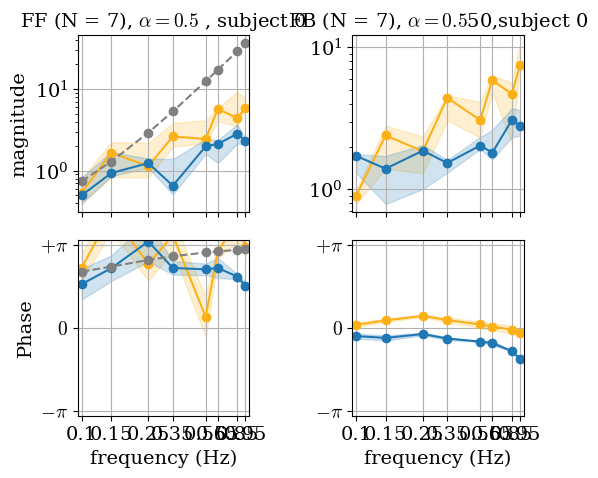

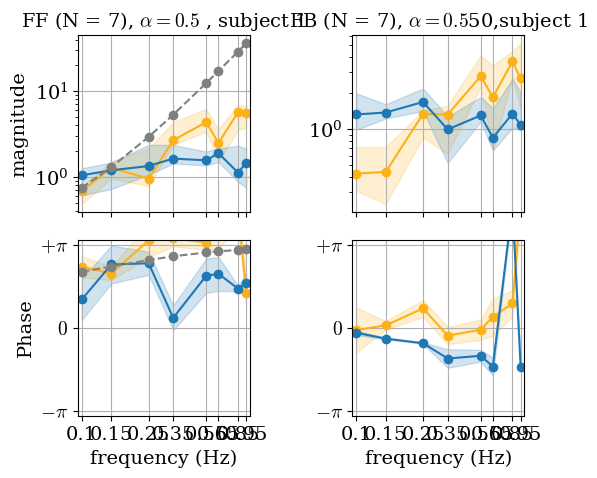

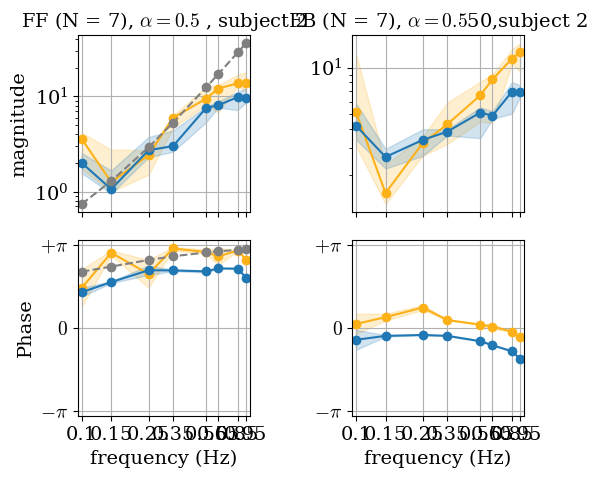

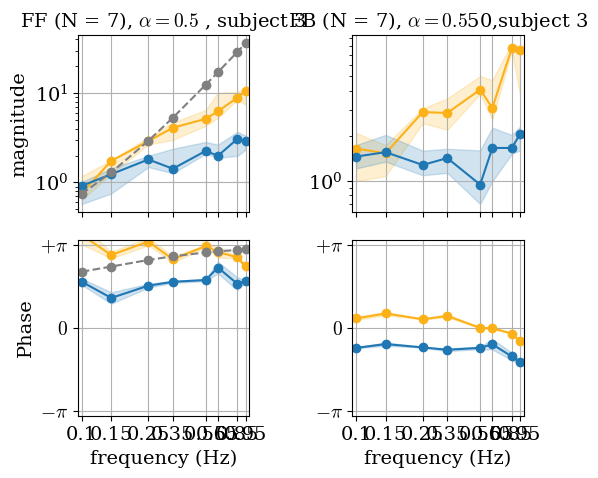

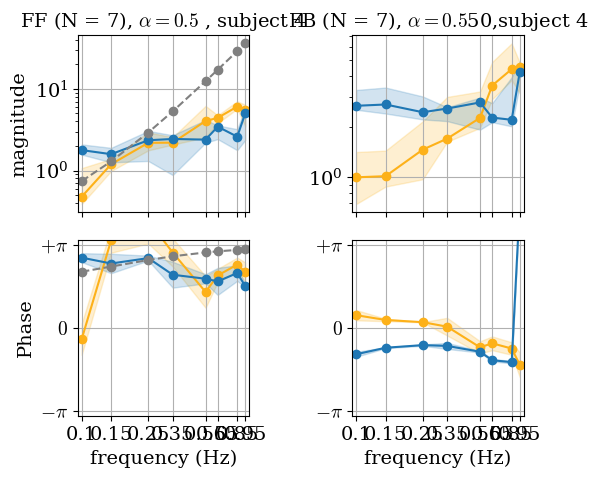

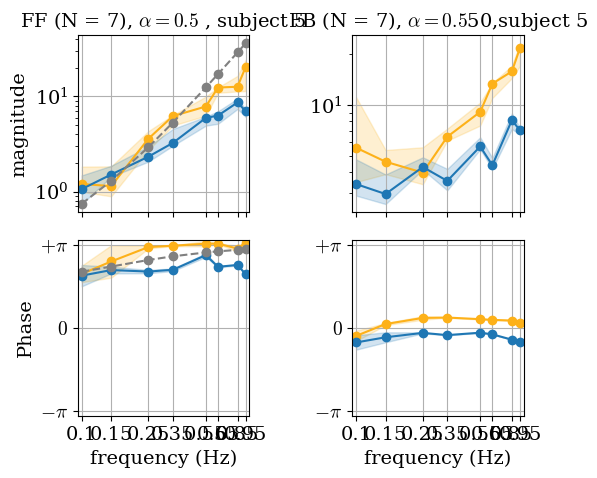

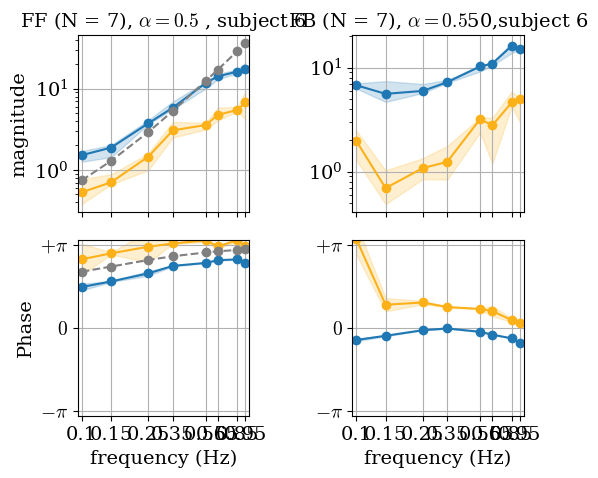

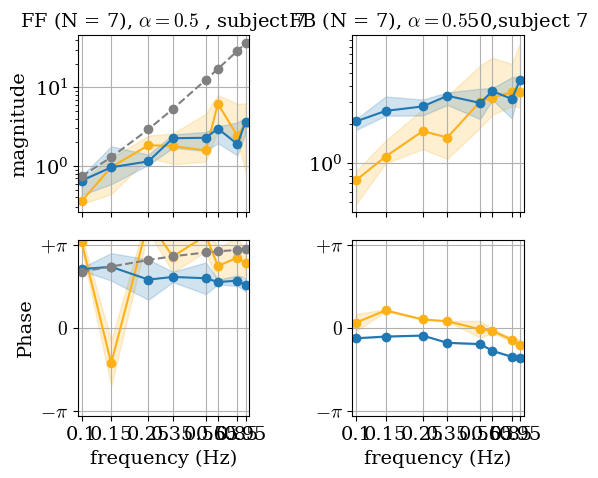

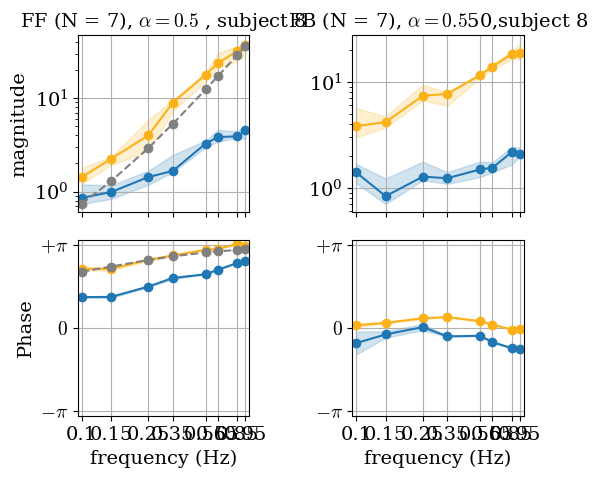

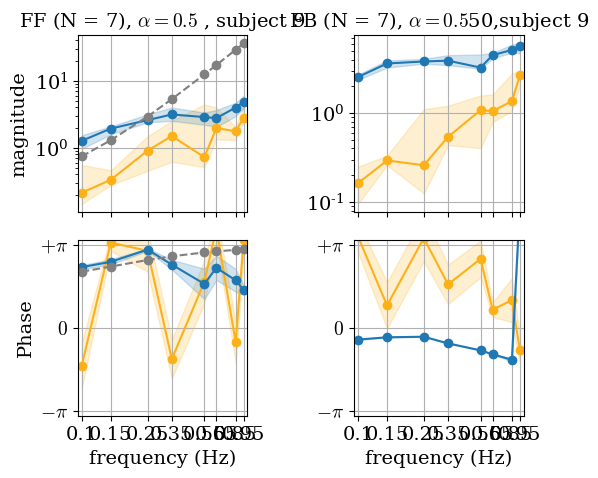

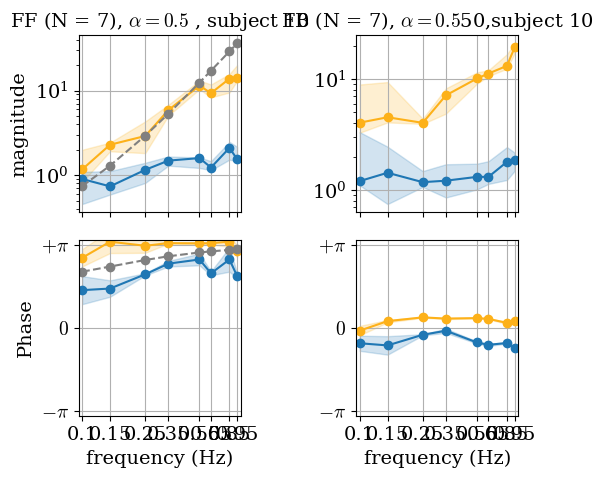

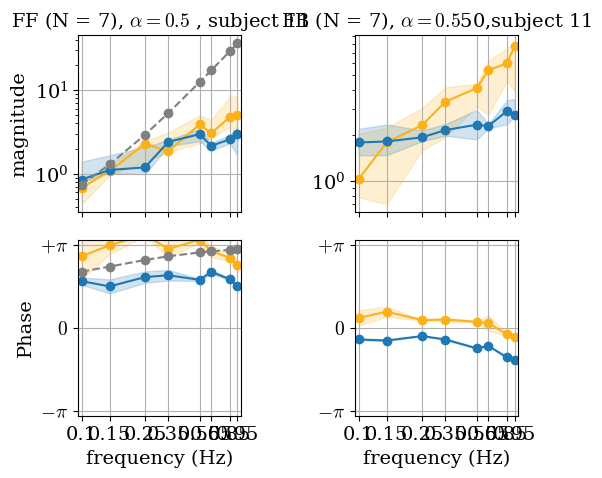

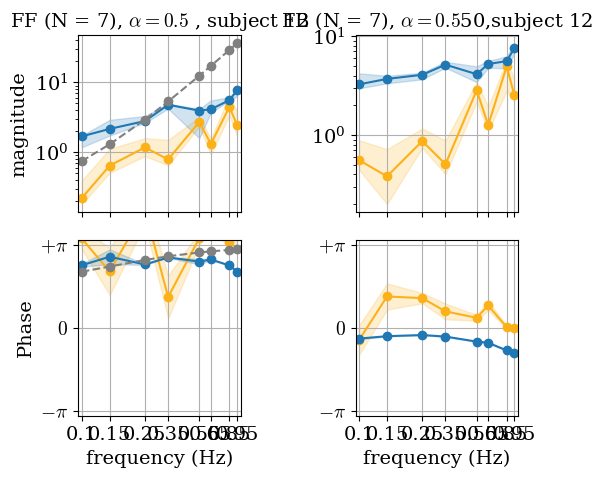

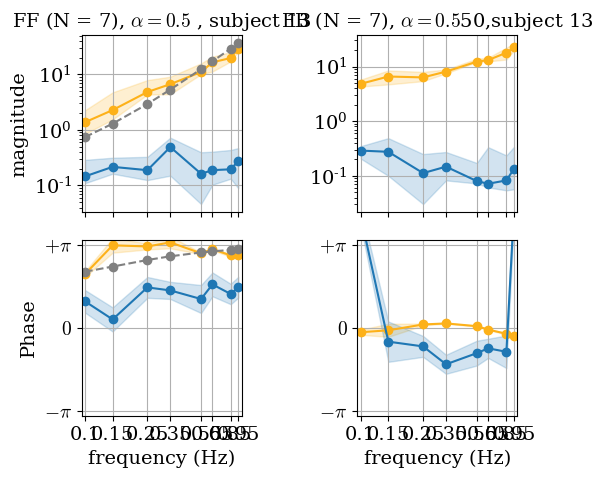

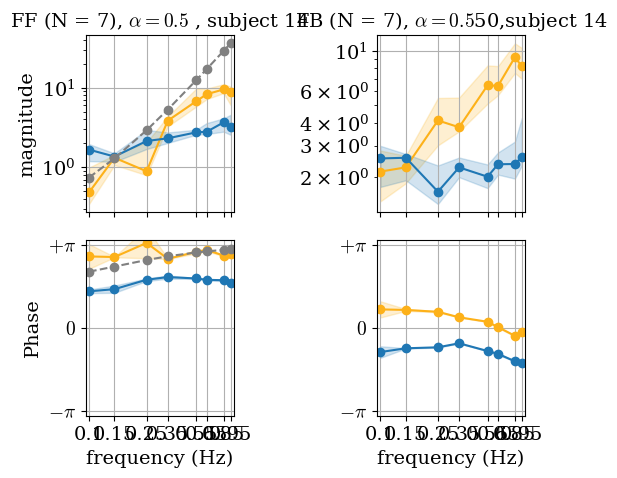

In [67]:
# Bode plot
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2 

for sub in range(subject_num):
    fig,axs = plt.subplots(2,2,sharex=True,figsize=(6,5))

    # F0
    F_mean = np.abs(F0[sub,cond,:,:]) 
    q25,q50,q75 = np.quantile(F_mean,[0.25,0.5,0.75],axis = 0) #across all trials
    # magnitude
    ax = axs[0,0]
    ax.plot(freqs,q50,'-o',label = r'F_0, $\alpha = $'+conditions[cond],color = colors['GOLD'])
    ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])
    # phase
    ax = axs[1,0]
    F_angle = np.angle(F0[sub,cond,:,:])
    z = np.mean(np.exp(1j*(F_angle-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-o',label = r'$\alpha = $'+conditions[cond],color = colors['GOLD'])
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

    # F1
    F_mean = np.abs(F1[sub,cond,:,:]) 
    q25,q50,q75 = np.quantile(F_mean,[0.25,0.5,0.75],axis = 0)
    # magnitude
    ax = axs[0,0]
    ax.plot(freqs,q50,'-o',label = r'F_1, $\alpha = $'+conditions[cond],color = colors['BLUE'])
    ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])
    # phase
    ax = axs[1,0]
    F_angle =  np.angle(F1[sub,cond,:,:])
    z = np.mean(np.exp(1j*(F_angle-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-o',label = r'$\alpha = $'+conditions[cond],color = colors['BLUE'])
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

    # B0
    mean = np.abs(B0[sub,cond,:,:]) 
    q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across all trials
    # magnitude
    ax = axs[0,1]
    ax.plot(freqs,q50,'-o',label = r'B_0, $\alpha = $'+conditions[cond],color = colors['GOLD'])
    ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])
    # phase
    ax = axs[1,1]
    angle = np.angle(B0[sub,cond,:,:])
    z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-o',label = r'$\alpha = $'+conditions[cond],color = colors['GOLD'])
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

    # B1
    mean = np.abs(B1[sub,cond,:,:]) 
    q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0)
    # magnitude
    ax = axs[0,1]
    ax.plot(freqs,q50,'-o',label = r'B_1, $\alpha = $'+conditions[cond],color = colors['BLUE'])
    ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])
    # phase
    ax = axs[1,1]
    angle =  np.angle(B1[sub,cond,:,:])
    z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-o',label = r'$\alpha = $'+conditions[cond],color = colors['BLUE'])
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

    ax = axs[0,0]
    ax.plot(freqs,np.abs(1/M),'--o',color= 'grey',label = r'$M^{-1}$')
    ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90) 
    ax.grid('on',zorder=-1)
    # ax.set_ylim(0.1,80)
    ax.set_yscale("log")
    ax.set_ylabel('magnitude')
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax = axs[1,0]
    ax.plot(freqs,np.angle(1/M),'--o',color= 'grey',label = r'$M^{-1}$')
    ax.set_ylabel('Phase') 
    ax.grid('on',zorder=-1)
    ax.set_ylim(ylimphase)
    ax.set_yticks(yticksphase)
    ax.set_yticklabels(yticklabelsphase)
    ax.set_xlabel('frequency (Hz)')

    ax = axs[0,1]
    ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90) 
    ax.grid('on',zorder=-1)
    # ax.set_ylim(0.1,80)
    ax.set_yscale("log")

    ax = axs[1,1]
    ax.grid('on',zorder=-1)
    ax.set_ylim(ylimphase)
    ax.set_yticks(yticksphase)
    ax.set_yticklabels(yticklabelsphase)
    ax.set_xlabel('frequency (Hz)')
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    axs[0,0].set_title(r'FF (N = 7), $\alpha = 0.5$ , subject '+str(sub))
    axs[0,1].set_title(r'FB (N = 7), $\alpha = 0.5$'+conditions[cond]+',subject '+str(sub))
    plt.tight_layout()
    plt.show()

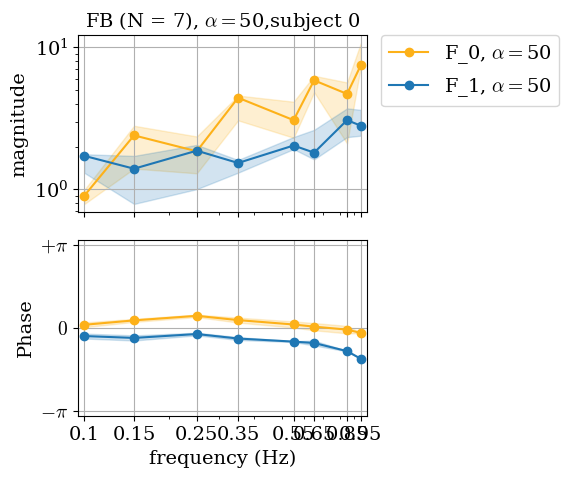

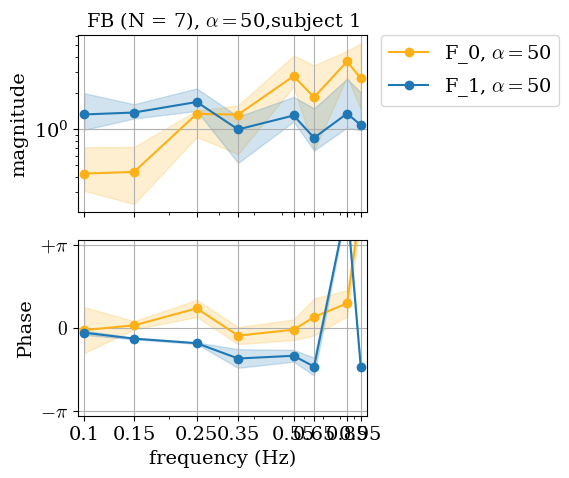

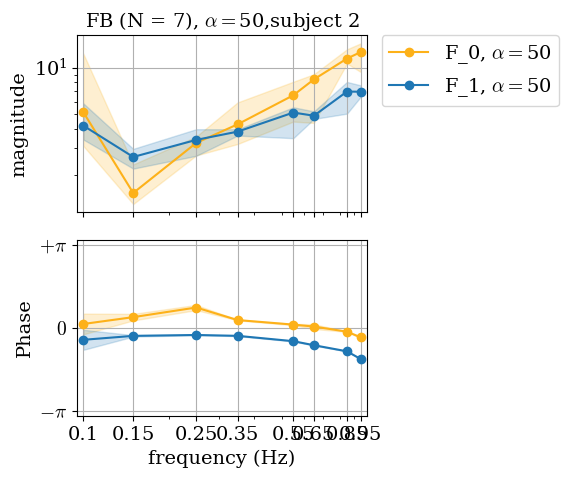

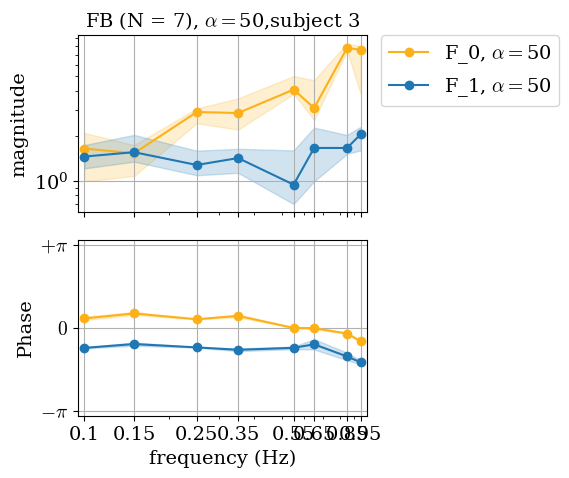

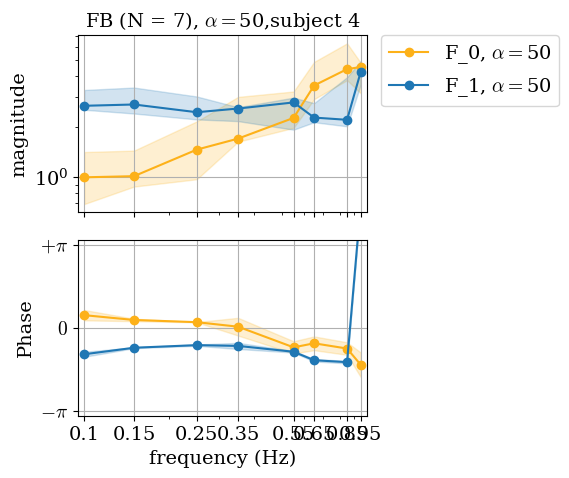

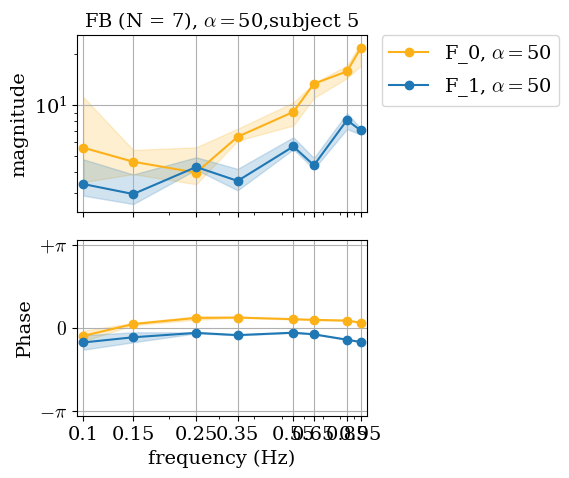

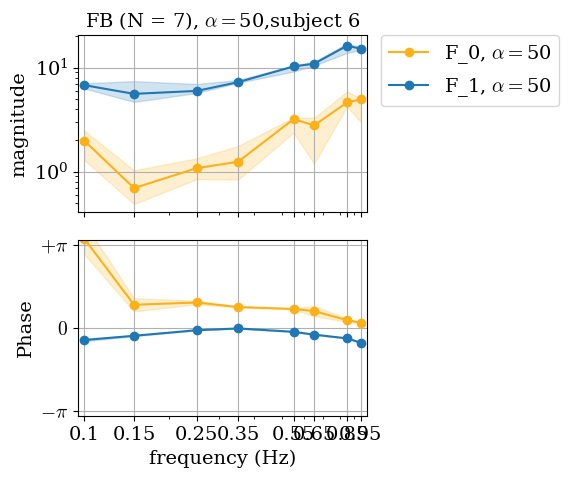

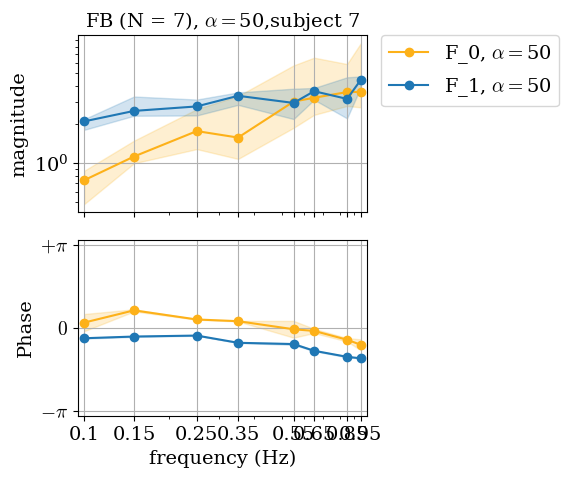

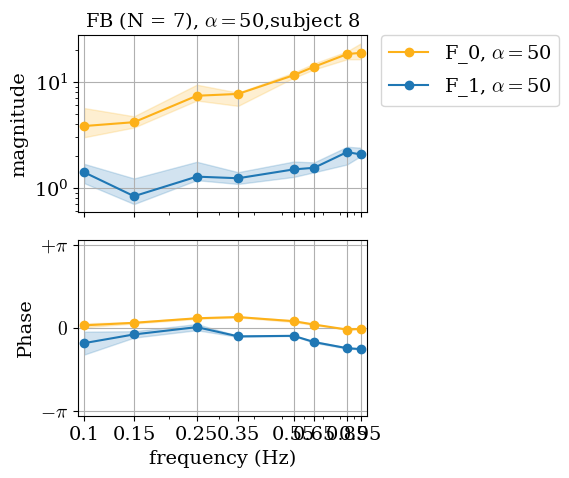

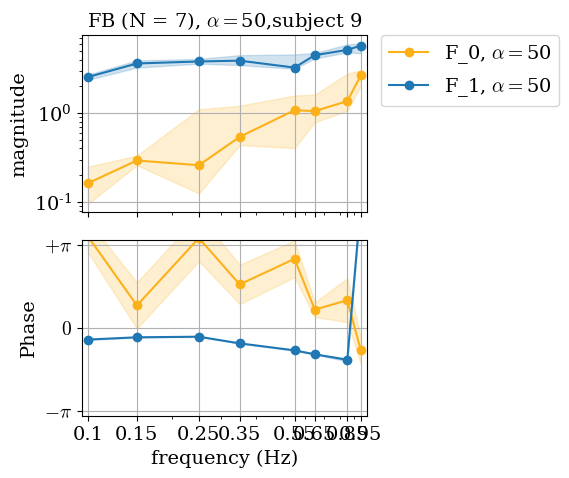

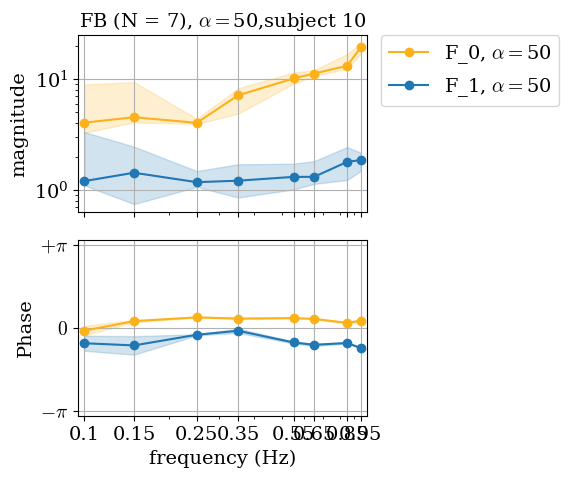

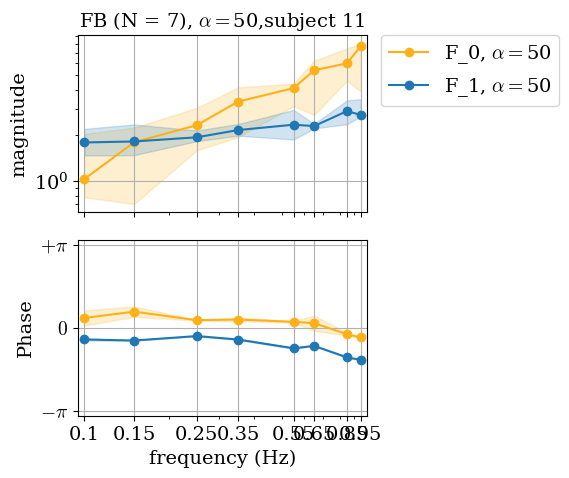

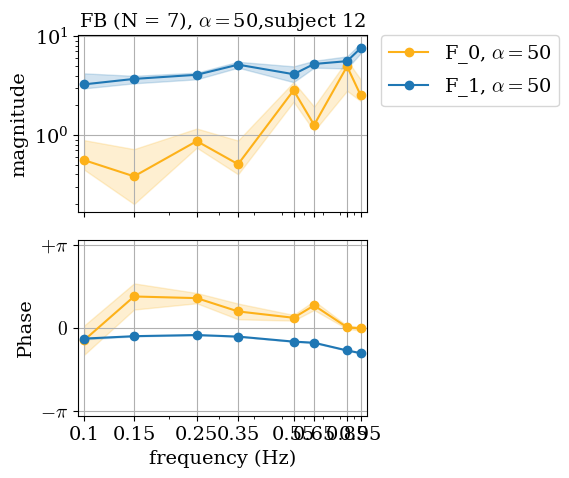

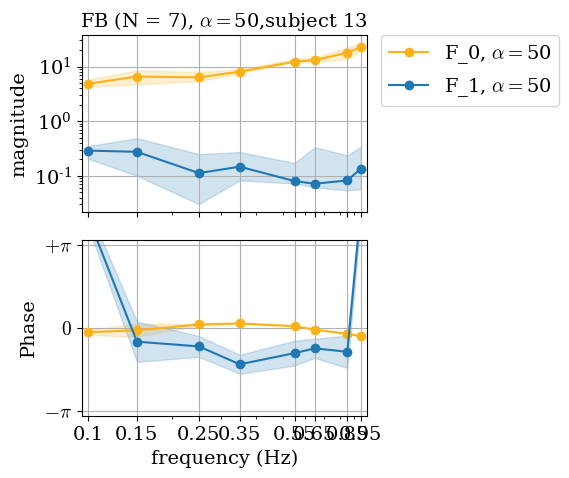

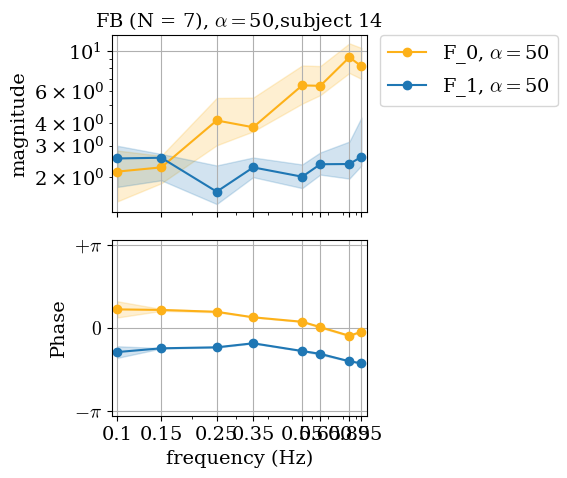

In [47]:
# Bode plot
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2 

for sub in range(subject_num):
    fig,axs = plt.subplots(2,1,sharex=True,figsize=(6,5))

    # F0
    F_mean = np.abs(B0[sub,cond,:,:]) 
    q25,q50,q75 = np.quantile(F_mean,[0.25,0.5,0.75],axis = 0) #across all trials
    # magnitude
    ax = axs[0]
    ax.plot(freqs,q50,'-o',label = r'F_0, $\alpha = $'+conditions[cond],color = colors['GOLD'])
    ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])
    # phase
    ax = axs[1]
    F_angle = np.angle(B0[sub,cond,:,:])
    z = np.mean(np.exp(1j*(F_angle-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-o',label = r'$\alpha = $'+conditions[cond],color = colors['GOLD'])
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

    # F1
    F_mean = np.abs(B1[sub,cond,:,:]) 
    q25,q50,q75 = np.quantile(F_mean,[0.25,0.5,0.75],axis = 0)
    # magnitude
    ax = axs[0]
    ax.plot(freqs,q50,'-o',label = r'F_1, $\alpha = $'+conditions[cond],color = colors['BLUE'])
    ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])
    # phase
    ax = axs[1]
    F_angle =  np.angle(B1[sub,cond,:,:])
    z = np.mean(np.exp(1j*(F_angle-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(freqs,mean,'-o',label = r'$\alpha = $'+conditions[cond],color = colors['BLUE'])
    ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

    ax = axs[0]
    # ax.plot(freqs,np.abs(1/M),'--o',color= 'grey',label = r'$M^{-1}$')
    ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90) 
    ax.grid('on',zorder=-1)
    # ax.set_ylim(0.1,80)
    ax.set_yscale("log")
    ax.set_ylabel('magnitude')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax = axs[1]
    # ax.plot(freqs,np.angle(1/M),'--o',color= 'grey',label = r'$M^{-1}$')
    ax.set_ylabel('Phase') 
    ax.grid('on',zorder=-1)
    ax.set_ylim(ylimphase)
    ax.set_yticks(yticksphase)
    ax.set_yticklabels(yticklabelsphase)
    ax.set_xlabel('frequency (Hz)')
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    axs[0].set_title(r'FB (N = 7), $\alpha = $'+conditions[cond]+',subject '+str(sub))
    plt.tight_layout()
    plt.show()

# EMG vs slider experts

In [43]:
avg_errors_slider = np.mean(errors[:,0,-10:],axis = 1) # slider only condition, last 10 trials
avg_errors_emg = np.mean(errors[:,4,-10:],axis = 1) # emg only condition, last 10 trials 
avg_errors_slider,avg_errors_emg

(array([ 35.62433228,  67.62653601,  33.79391584,  42.74228226,
        398.7174775 ,  16.33584601,  12.76561312,  40.80743136,
         21.77615783, 117.38331455,  23.76705301,  42.23285996,
         29.98181258, 110.51425493,  45.76572821]),
 array([ 21.9093186 , 319.70281212, 107.66276472,  23.31294693,
        287.51735259,  10.65559971,  13.91675751,  44.71628422,
          7.9101453 , 138.86865455,  13.02092415,  20.41523105,
         23.31573083,  43.54697506,  13.77337622]))

In [44]:
avg_errors_emg - avg_errors_slider

array([ -13.71501369,  252.07627611,   73.86884888,  -19.42933532,
       -111.20012491,   -5.6802463 ,    1.1511444 ,    3.90885286,
        -13.86601253,   21.48534   ,  -10.74612886,  -21.81762891,
         -6.66608174,  -66.96727988,  -31.99235198])

In [74]:
slider_experts = np.where([avg_errors_slider < 40])[1]
slider_nonexperts = np.where([avg_errors_slider > 40])[1]
emg_experts = np.where([avg_errors_emg < 25])[1]
emg_nonexperts = np.where([avg_errors_emg > 25])[1]
emg_experts,emg_nonexperts

(array([ 0,  3,  5,  6,  8, 10, 11, 12, 14], dtype=int64),
 array([ 1,  2,  4,  7,  9, 13], dtype=int64))

In [75]:
slider_experts,slider_nonexperts

(array([ 0,  2,  5,  6,  8, 10, 12], dtype=int64),
 array([ 1,  3,  4,  7,  9, 11, 13, 14], dtype=int64))

In [ ]:
# find who is better at which modality
slider_experts = []
emg_experts = []
for sub in range(subject_num):
    diff = avg_errors_emg[sub] - avg_errors_slider[sub]
    if diff > 0 :
        slider_experts.append(sub)
    elif diff < 0 :
        emg_experts.append(sub)
slider_experts = np.array(slider_experts)
emg_experts = np.array(emg_experts)
# slider_experts = np.argsort(avg_errors_slider)[:5]
# emg_experts = np.argsort(avg_errors_emg)[:5]
slider_experts_num = len(slider_experts)
emg_experts_num = len(emg_experts)

print('slider better = ',slider_experts)
print('emg better = ',emg_experts)


slider better =  [1 2 6 7 9]
emg better =  [ 0  3  4  5  8 10 11 12 13 14]


: 

In [32]:
# F1_error = np.mean(np.abs(F1[:,0,:,:]-1/M),axis = 1) # slider only condition, across all trials
# F0_error = np.mean(np.abs(F0[:,4,:,:]-1/M),axis = 1) # emg only condition, across all trials
# F1_error.shape

(15, 8)

In [36]:
# # find who is better at which modality
# slider_experts = []
# emg_experts = []
# for sub in range(subject_num):
#     diff1 = np.mean(np.abs(F0_error[sub]))
#     diff2 = np.mean(np.abs(F1_error[sub]))
#     if diff1 > diff2 :
#         slider_experts.append(sub)
#     else:
#         emg_experts.append(sub)
# slider_experts = np.array(slider_experts)
# emg_experts = np.array(emg_experts)
# # slider_experts = np.argsort(avg_errors_slider)[:5]
# # emg_experts = np.argsort(avg_errors_emg)[:5]
# slider_experts_num = len(slider_experts)
# emg_experts_num = len(emg_experts)

# print('slider experts = ',slider_experts)
# print('emg experts = ',emg_experts)


slider experts =  [ 1  2 12]
emg experts =  [ 0  3  4  5  6  7  8  9 10 11 13 14]


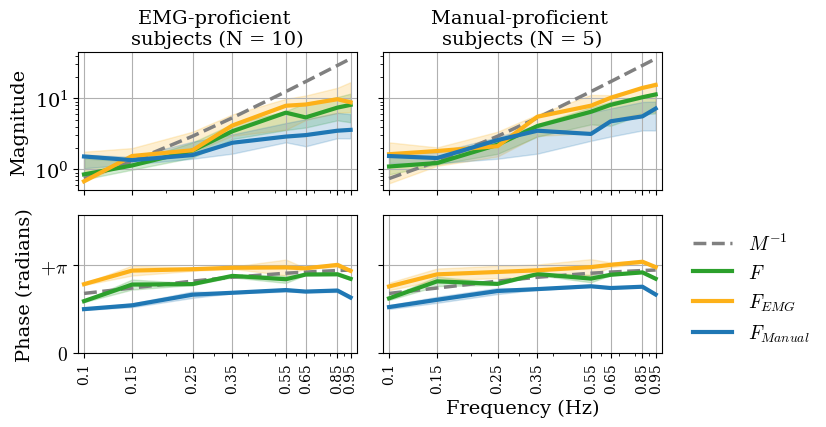

In [61]:
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (0, np.pi+1.8)
yticksphase = [0.,np.pi]
yticklabelsphase = [r'$0$',r'$+\pi$']
TFlabels = ['F','B','F0','F1','B0','B1']
last_few_trials = 7 # cross trials (N//2)

for cond in [2]:
    fig,axs = plt.subplots(2,2,sharex = 'col', sharey = 'row',figsize=(8.5,4.5))

    for i,sub in enumerate([emg_experts,slider_experts]):
        # magnitude
        ax = axs[0,i]
        ax.plot(freqs,np.abs(1/M),'--',color= 'grey',label = r'Machine inverse $M^{-1}$',linewidth = 2.5)
        
        mean = np.mean(np.abs(F[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
        q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
        ax.plot(freqs,q50,'-',label = 'Feedforward (combined)',color = colors['GREEN'],linewidth = 3)
        ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GREEN'])

        mean = np.mean(np.abs(F0[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
        q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
        ax.plot(freqs,q50,'-',label = 'Feedforward (EMG pathway)',color = colors['GOLD'],linewidth = 3)
        ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['GOLD'])

        mean = np.mean(np.abs(F1[sub,cond,-last_few_trials:,:]),axis = 1) #mean across trials
        q25,q50,q75 = np.quantile(mean,[0.25,0.5,0.75],axis = 0) #across subjects
        ax.plot(freqs,q50,'-',label = 'Feedforward (Manual pathway)',color = colors['BLUE'],linewidth = 3)
        ax.fill_between(freqs, q25, q75, alpha=0.2, color=colors['BLUE'])

        ax.set_xscale("log")
        ax.set_xlim(xlim)
        ax.grid('on',zorder=-1)
        # ax.set_ylim(0.1,80)
        ax.set_yscale("log")
        
        # phase
        ax = axs[1,i]
        ax.plot(freqs,np.angle(1/M),'--',color= 'grey',label = r'$M^{-1}$',linewidth = 2.5)

        angle = np.angle(np.mean(np.exp(1j*(np.angle(F[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
        z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
        mean = np.angle(z)+np.pi/2
        disp = 1 - np.abs(z)
        ax.plot(freqs,mean,'-',label = r'$F$',color = colors['GREEN'],linewidth = 3)
        ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GREEN'])

        angle = np.angle(np.mean(np.exp(1j*(np.angle(F0[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
        z = np.mean(np.exp(1j*(angle-np.pi)), axis=0) #mean across subjects
        mean = np.angle(z)+np.pi
        disp = 1 - np.abs(z)
        ax.plot(freqs,mean,'-',label = r'$F_{EMG}$',color = colors['GOLD'],linewidth = 3)
        ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

        angle = np.angle(np.mean(np.exp(1j*(np.angle(F1[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
        z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
        mean = np.angle(z)+np.pi/2
        disp = 1 - np.abs(z)
        ax.plot(freqs,mean,'-',label = r'$F_{Manual}$',color = colors['BLUE'],linewidth = 3)
        ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

        ax.grid('on',zorder=-1)
        ax.set_ylim(ylimphase)
        ax.set_yticks(yticksphase)
        ax.set_yticklabels(yticklabelsphase)

        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks,rotation=90,fontsize = 10) 
    axs[1,1].set_xlabel('Frequency (Hz)')
    axs[0,0].set_ylabel('Magnitude')
    axs[1,0].set_ylabel('Phase (radians)')
    # axs[1,1].legend(loc='lower right', ncol = 2,fontsize = 15)
    axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False,fontsize = 14)
    axs[0,0].set_title('EMG-proficient ''\n''subjects (N = '+str(emg_experts_num)+')',fontsize = 14)
    axs[0,1].set_title('Manual-proficient ''\n''subjects (N = '+str(slider_experts_num)+')',fontsize = 14)
    # axs[0,2].set_title('Both-proficient ''\n''subjects (N = '+str(both_experts_num)+')',fontsize = 14)
    axs[0,1].get_shared_x_axes().join(axs[0,0], axs[0,1])
    # axs[0,2].get_shared_x_axes().join(axs[0,0], axs[0,1])

    plt.tight_layout()
    # fig.savefig('group_subjects.svg')
    plt.show()

# F0 - F1

In [15]:
# condition 2, for every trial, find F0 - F1
cond = 2
F0_F1 = np.zeros((subject_num,trial_num//2,len(IX)),dtype=complex)
for sub in range(subject_num):
    for trial in range(trial_num//2):
        F0_F1[sub,trial,:] = F0[sub,cond,trial,:]-F1[sub,cond,trial,:]

In [62]:
cond = 2
F0_F1_emg = []
F0_F1_slider = []
for sub in emg_experts:
    for trial in range(trial_num//2):
        F0_F1_emg.append(F0[sub,cond,trial,:]-F1[sub,cond,trial,:])
for sub in slider_experts:
    for trial in range(trial_num//2):
        F0_F1_slider.append(F0[sub,cond,trial,:]-F1[sub,cond,trial,:])

F0_F1_emg = np.array(F0_F1_emg)
F0_F1_slider = np.array(F0_F1_slider)
F0_F1_emg.shape

(49, 8)

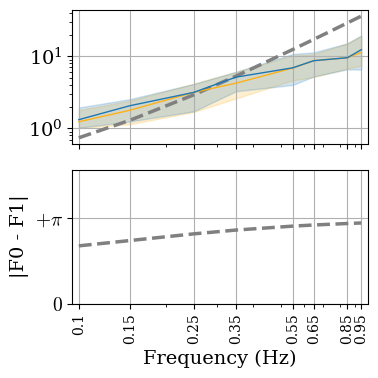

In [63]:
# Bode plot F0 - F1

# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (0, np.pi+1.8)
yticksphase = [0.,np.pi]
yticklabelsphase = [r'$0$',r'$+\pi$']
TFlabels = ['F','B','F0','F1','B0','B1']
last_few_trials = 7 # cross trials (N//2)

cond = 2
fig,axs = plt.subplots(2,1,sharex = 'col', sharey = 'row',figsize=(4,4))

# for i,sub in enumerate([emg_experts,slider_experts]):
    
# magnitude
ax = axs[0]
ax.plot(freqs,np.abs(1/M),'--',color= 'grey',label = r'Machine inverse $M^{-1}$',linewidth = 2.5)

# for sub in emg_experts:
q25,q50,q75 = np.quantile(np.abs(F0_F1_emg),[0.25,0.5,0.75],axis = 0) #across subjects
ax.plot(freqs,q50,'-',label = 'Feedforward (EMG pathway)',color = colors['GOLD'],linewidth = 1)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])

# for sub in slider_experts:
q25,q50,q75 = np.quantile(np.abs(F0_F1_slider),[0.25,0.5,0.75],axis = 0) #across trials
ax.plot(freqs,q50,'-',label = 'Feedforward (slider pathway)',color = colors['BLUE'],linewidth = 1)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])

ax.set_xscale("log")
ax.set_xlim(xlim)
ax.grid('on',zorder=-1)
# ax.set_ylim(0.1,80)
ax.set_yscale("log")
    
# phase
ax = axs[1]
# ax = axs[1,i]
ax.plot(freqs,np.angle(1/M),'--',color= 'grey',label = r'$M^{-1}$',linewidth = 2.5)

# angle = np.angle(np.mean(np.exp(1j*(np.angle(F[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
# z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
# mean = np.angle(z)+np.pi/2
# disp = 1 - np.abs(z)
# ax.plot(freqs,mean,'-',label = r'$H$',color = colors['GREEN'],linewidth = 3)
# ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GREEN'])
# sub = emg_experts
# angle = np.angle(np.mean(np.exp(1j*(np.angle(F0[sub,cond,-last_few_trials:,:] - F1[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
# z = np.mean(np.exp(1j*(angle-np.pi)), axis=0) #mean across subjects
# mean = np.angle(z)+np.pi
# disp = 1 - np.abs(z)
# ax.plot(freqs,mean,'-',label = r'$H_{EMG}$',color = colors['GOLD'],linewidth = 3)
# ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

# sub = slider_experts
# angle = np.angle(np.mean(np.exp(1j*(np.angle(F0[sub,cond,-last_few_trials:,:] - F1[sub,cond,-last_few_trials:,:]))),axis = 1)) #mean across trials
# z = np.mean(np.exp(1j*(angle-np.pi/2)), axis=0) #mean across subjects
# mean = np.angle(z)+np.pi/2
# disp = 1 - np.abs(z)
# ax.plot(freqs,mean,'-',label = r'$H_{Manual}$',color = colors['BLUE'],linewidth = 3)
# ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

ax.grid('on',zorder=-1)
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 10) 


ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|F0 - F1|')
# axs[1,0].set_ylabel('Phase (radians)')
# # axs[1,1].legend(loc='lower right', ncol = 2,fontsize = 15)
# axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False,fontsize = 14)
# axs[0,0].set_title('EMG-proficient ''\n''subjects (N = '+str(emg_experts_num)+')',fontsize = 14)
# axs[0,1].set_title('Manual-proficient ''\n''subjects (N = '+str(slider_experts_num)+')',fontsize = 14)
# # axs[0,2].set_title('Both-proficient ''\n''subjects (N = '+str(both_experts_num)+')',fontsize = 14)
# axs[0,1].get_shared_x_axes().join(axs[0,0], axs[0,1])
# axs[0,2].get_shared_x_axes().join(axs[0,0], axs[0,1])

plt.tight_layout()
# fig.savefig('group_subjects.svg')
plt.show()